## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

-- Which variables are significant in predicting the price of a house, and
-- How well those variables describe the price of a house.

## Business Goal:

1.Surprise Housing needs an understanding on various factors which would influence the pricing of houses.

2.Surprise Housing main business model is to buy at lesser price and offer to customer at a competetive price so that they would have better profit margin.

3.Price predictor variables should help them to buy competetive house with features which attracts customers in new market.

In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [2]:
# importing dataset

propertyInfo = pd.read_csv(r'C:\Users\raghu\Downloads\train.csv')
propertyInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking proparty or housing dataframe

# info

propertyInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking dataframe shape

propertyInfo.shape

(1460, 81)

In [5]:
# Viewing mean, standard deviation, min and max & percentails of numerical 

propertyInfo.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking the nul values in the columns

propertyInfo.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

# Data Clearning

## Removing null values in Categorical features

In [7]:
# check for null values in categorical features and display the count > zero

propertyInfo.select_dtypes(include='object').isnull().sum()[propertyInfo.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Replacing NA with None for above identified features

for col_na in ('Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
               'GarageQual','GarageCond','PoolQC','Fence','MiscFeature'):
    propertyInfo[col_na]= propertyInfo[col_na].fillna('None')

In [9]:
# Chekcing for NA after imputing 
propertyInfo.select_dtypes(include='object').isna().sum()[propertyInfo.select_dtypes(include='object').isna().sum()>0]


Series([], dtype: int64)

In [10]:
# Identifying duplicate rows in dataframe

propertyInfo.duplicated().value_counts()

False    1460
dtype: int64

In [11]:
# Identifying repeated values count > 90%  in categorical features

def RepeatedCat():
    dupe_columns = []
    cat_features = propertyInfo.select_dtypes(include = ['object'])

    for cl in (cat_features):
        if(propertyInfo[cl].value_counts().max() >= 1305): # 90% of 1460
            dupe_columns.append(cl)
    return dupe_columns

ColumnGreatNintyPercent = RepeatedCat()



In [12]:
# Analysing repeated values categorical feature columns.
print(ColumnGreatNintyPercent)

['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']


In [13]:
# Removing the columns which deviates normal distribution because of skewed data

propertyInfo.drop(ColumnGreatNintyPercent, axis = 1, inplace=True)

In [14]:
propertyInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,0,0,0,None,0,12,2008,WD,Normal,250000


In [15]:
# Identifying repeated values count > 85%  after dropping greater than >90% repeated valuesin categorical features

def RepeatedCat():
    dupe_columns = []
    cat_features = propertyInfo.select_dtypes(include = ['object'])

    for cl in (cat_features):
        if(propertyInfo[cl].value_counts().max() >= 1241): # 85% of 1460
            dupe_columns.append(cl)
    return dupe_columns

ColumnGreatNintyPercent = RepeatedCat()

In [16]:
# Analysing >85% repeated values categorical features.
print(ColumnGreatNintyPercent)

['Condition1', 'ExterCond', 'BsmtFinType2', 'SaleType']


In [17]:
# Furhter removing the columns which deviates normal distribution because of skewed data

propertyInfo.drop(ColumnGreatNintyPercent, axis = 1, inplace=True)

In [18]:
propertyInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


## Removing null vlues in Numerical features

In [19]:
# Checking the null values in numerical features
propertyInfo.select_dtypes(include=['int64','float']).isnull().sum()[propertyInfo.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [20]:
# Impute null values with mean for numerical features (LotFrontage and MasVnrArea)

propertyInfo['LotFrontage'] = propertyInfo['LotFrontage'].replace(np.nan, propertyInfo['LotFrontage'].median())
propertyInfo['MasVnrArea'] = propertyInfo['MasVnrArea'].replace(np.nan, propertyInfo['MasVnrArea'].median())

In [21]:
# Creating a new column OrigVsRemod, original represents 0, remodel represents 1

def DeterminRemodel(row):
    if (row['YearBuilt'] == row['YearRemodAdd']): # Construction year is equal to remodel year
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']): # Construction year is less than remodel year
        return 1
    else:
        return 2
    
propertyInfo['OrigVsRemod'] = propertyInfo.apply(DeterminRemodel, axis=1)

propertyInfo.head()
    
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OrigVsRemod
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [22]:
# Caluclate property/house age at the time of selling based on construction / remodel date

def DeterminPropertyAge(row):
    if (row['OrigVsRemod'] == 0):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
    
propertyInfo['PropertyAge'] = propertyInfo.apply(DeterminPropertyAge, axis=1)
propertyInfo.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OrigVsRemod,PropertyAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [23]:
# GarageYrBlt age calculation based on year of consturction and determine old (0) or new(1) Garage. 
# Before calculating the age of GarageYrBlt null values will be imputed with 0 and these are considered as old(0)

# Imputing the null values with 0 for GarageYrBuilt.

propertyInfo['GarageYrBlt'] = propertyInfo['GarageYrBlt'].fillna(0)
propertyInfo['GarageYrBlt'] = propertyInfo['GarageYrBlt'].astype(int)

# Determining new or old garage

def DeterminGarageAge(row):
    if row == 0: # these would imputed rows with zero
        return 0
    elif row >=1900 and row < 2002: # Considering last 20 years properties as new(1) and rest are old(0)
        return 0
    else:
        return 1
propertyInfo['GarageAge'] = propertyInfo['GarageYrBlt'].apply(DeterminGarageAge)

propertyInfo.head()
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OrigVsRemod,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,0


In [24]:
# As new features are created from YearBuilt, YearRemodAdd, YrSold, GarageBklt, these can be dropped. 
# New features will be used for further analsis

propertyInfo.drop(['YearBuilt', 'YearRemodAdd', 'YrSold','GarageYrBlt'], axis = 1, inplace = True)


In [25]:
# Checking the dataset after dropping the columns

propertyInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,OrigVsRemod,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,Normal,250000,0,8,0


### Handling numerical columns with null values

In [26]:
# Drop the numerical columns which are having more than 85% repeated values.

def DeterminNumericNullCount():
    RepCol = []
    numerical_col = propertyInfo.select_dtypes(include =['int64', 'float'])
    for cl in (numerical_col):
        if (propertyInfo[cl].value_counts().max() >= 1241): # 85% of 1450 (values repeating 1241 times in a column)
            RepCol.append(cl)
    return RepCol

columnsToDrop = DeterminNumericNullCount()

propertyInfo.drop(columnsToDrop, axis =1, inplace = True)
        

In [27]:
# Checking dataset after dropping the columns

propertyInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OrigVsRemod,PropertyAge,GarageAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,548,0,61,None,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,460,298,0,None,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,608,0,42,None,9,Normal,223500,1,6,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,642,0,35,None,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,836,192,84,None,12,Normal,250000,0,8,0


In [28]:
# Checking again null values percentage in the dataset

null_percentage = round(100*(propertyInfo.isnull().sum() / len(propertyInfo.index)), 2)

print(null_percentage)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
Fence            0.0
MoSold           0.0
SaleCondition    0.0
SalePrice        0.0
OrigVsRemod  

In [29]:
#Checking for the duplicates in the dataset again

propertyInfo[propertyInfo.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OrigVsRemod,PropertyAge,GarageAge


## Handling Outliers 

In [30]:
# Checking outliers

propertyInfo.describe(percentiles = [.25,.5,.75,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,OrigVsRemod,PropertyAge,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,0.476712,22.950000,0.243151
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,0.499629,20.640653,0.429132
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,0.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,442567.010000,1.000000,60.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,755000.000000,1.000000,60.000000,1.000000


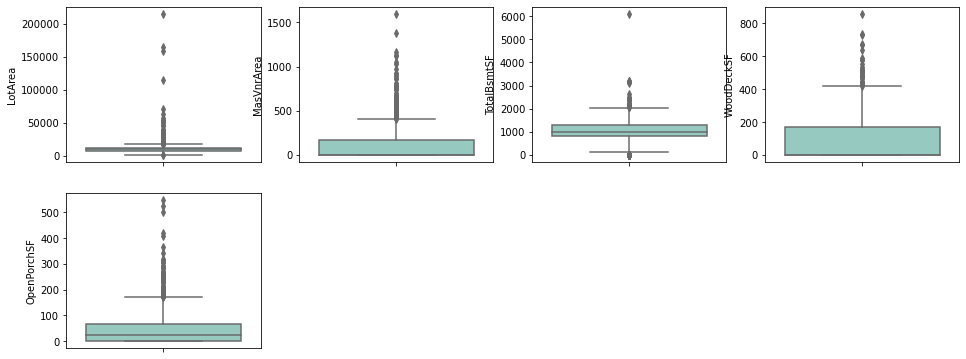

In [31]:
# Checking the outliers in box plot for better visibility

plt.figure(figsize = (16,20))
plt.subplot(6,4,1)
se.boxplot(y= 'LotArea', palette = 'Set3', data = propertyInfo)
plt.subplot(6,4,2)
se.boxplot(y= 'MasVnrArea', palette = 'Set3', data = propertyInfo)
plt.subplot(6,4,3)
se.boxplot(y= 'TotalBsmtSF', palette = 'Set3', data = propertyInfo)
plt.subplot(6,4,4)
se.boxplot(y= 'WoodDeckSF', palette = 'Set3', data = propertyInfo)
plt.subplot(6,4,5)
se.boxplot(y= 'OpenPorchSF', palette = 'Set3', data = propertyInfo)

plt.show()



In [32]:
# Clearing Outliers beyond 99% 

# LotArea

otLotArea = propertyInfo['LotArea'].quantile(0.99)
propertyInfo = propertyInfo[propertyInfo['LotArea'] < otLotArea]

#MasVnrArea

otMasVnrArea = propertyInfo['MasVnrArea'].quantile(0.99)
propertyInfo = propertyInfo[propertyInfo['MasVnrArea'] < otMasVnrArea]

# TotalBsmtSF
otTotalBsmtSF = propertyInfo['TotalBsmtSF'].quantile(0.99)
propertyInfo = propertyInfo[propertyInfo['TotalBsmtSF'] < otTotalBsmtSF]

# WoodDeckSF

otWoodDeckSF = propertyInfo['WoodDeckSF'].quantile(0.99)
propertyInfo = propertyInfo[propertyInfo['WoodDeckSF'] < otWoodDeckSF]

# OpenPorchSF

otOpenPorchSF = propertyInfo['OpenPorchSF'].quantile(0.99)
propertyInfo = propertyInfo[propertyInfo['OpenPorchSF'] < otOpenPorchSF]


In [33]:
# How much data is retained afrer outlier treatment?

retained_data = round(100*(len(propertyInfo)/1460),2)

print(retained_data)

94.93


# Data Visualization

C:\Users\raghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


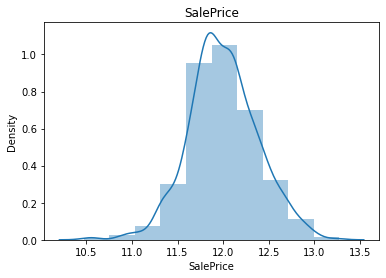

In [34]:
# Trasforming the sales price for better visualization. 

propertyInfo['SalePrice'] = np.log1p(propertyInfo['SalePrice'])

# Ploting sales price as target variable

plt.title('SalePrice')
se.distplot(propertyInfo['SalePrice'], bins =10)
plt.show()


Seems to be normal distribution 

<Figure size 864x432 with 0 Axes>

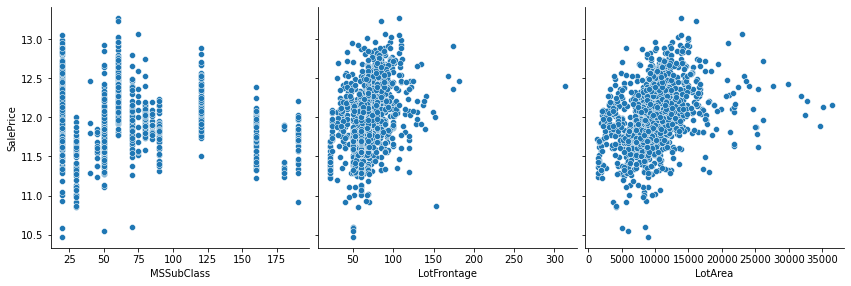

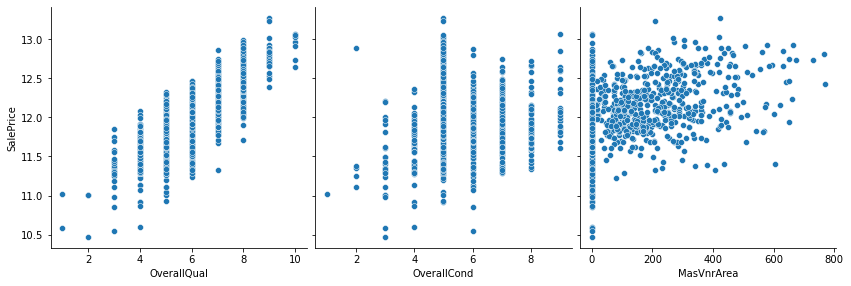

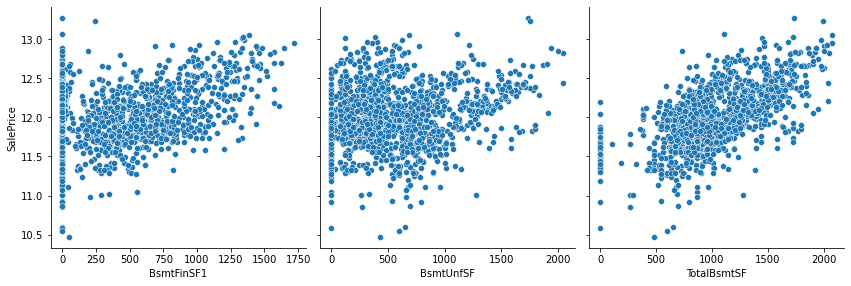

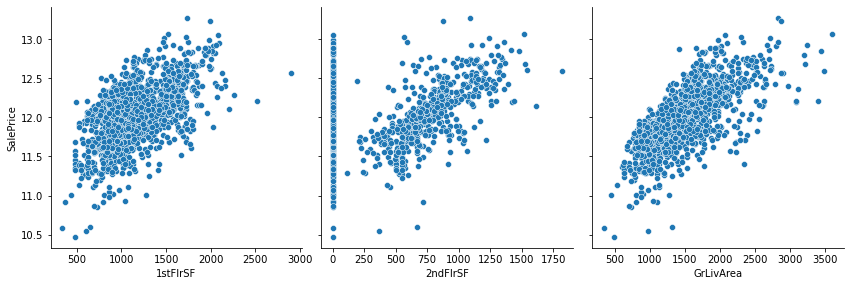

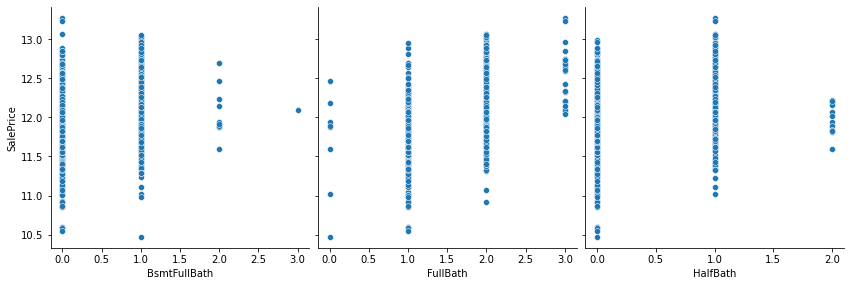

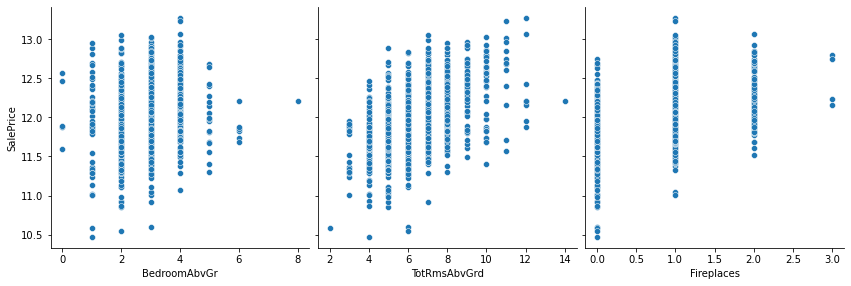

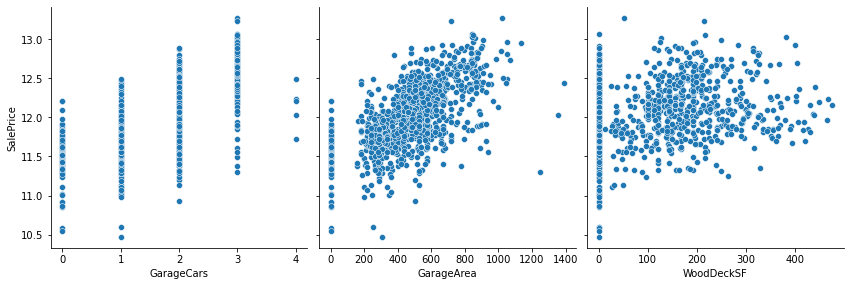

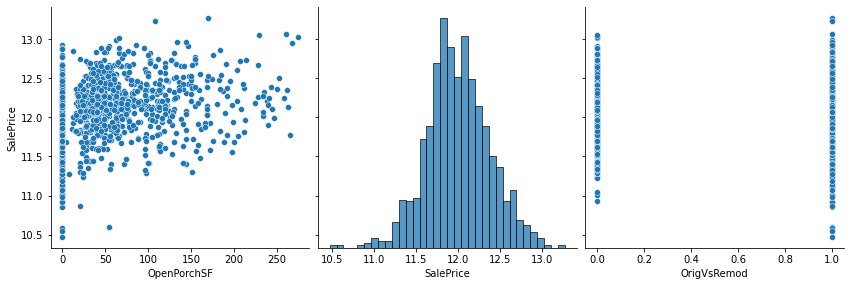

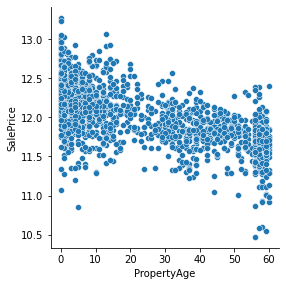

In [35]:
# Check the numerical values using piarplots

plt.figure(figsize =(12,6))
se.pairplot(propertyInfo, x_vars = ['MSSubClass', 'LotFrontage','LotArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['OverallQual', 'OverallCond','MasVnrArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['1stFlrSF','2ndFlrSF','GrLivArea'], y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['BsmtFullBath','FullBath','HalfBath'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['BedroomAbvGr','TotRmsAbvGrd','Fireplaces'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['GarageCars','GarageArea','WoodDeckSF'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['OpenPorchSF','SalePrice','OrigVsRemod'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')
se.pairplot(propertyInfo, x_vars = ['PropertyAge'],y_vars = 'SalePrice', height=4, aspect =1, kind= 'scatter')



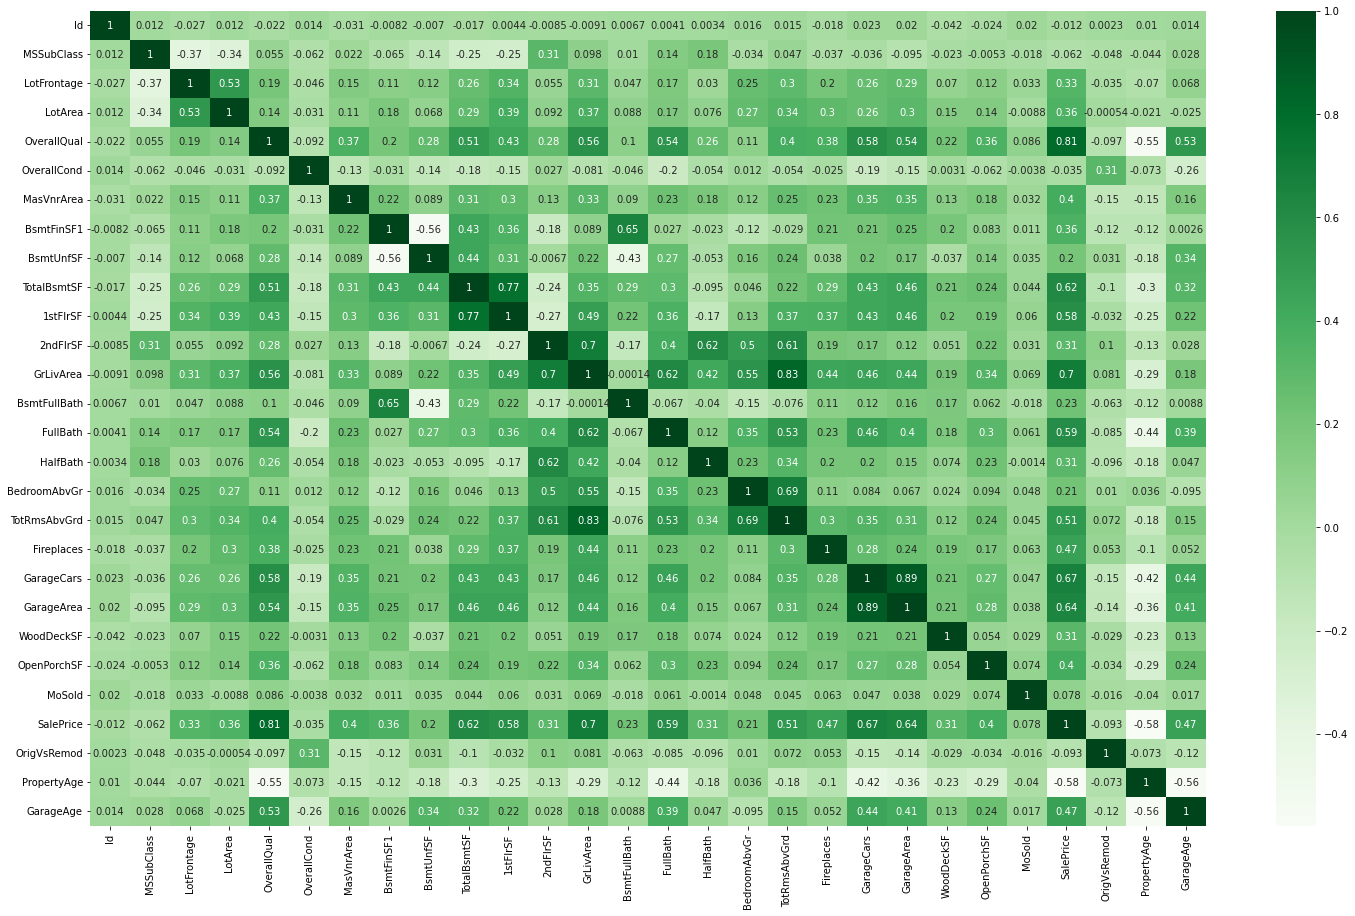

In [36]:
# Check the Correlation of numerical features

plt.figure(figsize = (25,15))
se.heatmap(propertyInfo.corr(), annot = True, cmap = "Greens")
plt.show()

In [37]:
# Handling colleniarity of independent features

# TotRmsAbvGrd and GrLivArea show 83% correlation
# GarageArea and GarageCars show 89% correlation

# Dropping the high correlated independent features 

propertyInfo.drop(['TotRmsAbvGrd','GarageArea'], axis = 1, inplace = True)


In [38]:
# Checking dataframe shape after dropping the features

propertyInfo.shape

(1386, 48)

# Data Preparation

In [39]:
# Handling feture values which are ordered list or unorder list

# A sequence of numbers will be assinged to ordered feature values

propertyInfo['New_LotShape'] = propertyInfo['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3':0})
propertyInfo['New_ExterQual'] = propertyInfo['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
propertyInfo['New_BsmtQual'] = propertyInfo['BsmtQual'].map({'Ex':5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
propertyInfo['New_HeatingQC'] = propertyInfo['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
propertyInfo['New_KitchenQual'] = propertyInfo['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
propertyInfo['New_FireplaceQu'] = propertyInfo['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'None': 0})
propertyInfo['New_BsmtExposure'] = propertyInfo['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
propertyInfo['New_BsmtFinType1'] = propertyInfo['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 
                                                                     'Unf': 1, 'None': 0})
propertyInfo['New_GarageFinish'] = propertyInfo['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
propertyInfo['New_BldgType'] = propertyInfo['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, 
                                                             '1Fam': 1, 'None': 0})
propertyInfo['New_HouseStyle'] = propertyInfo['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,
                                                                '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0})
propertyInfo['New_Fence'] = propertyInfo['Fence'].map({'GdPrv':4, 'GdWo': 3, 'MnPrv': 2,'MnWw':1,'None':0 })
propertyInfo['New_LotConfig'] = propertyInfo['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 
                                                              'FR3': 1, 'None': 0})

# Features which can't be arranged in ordered will be categorised as 0 or 1
propertyInfo['New_MasVnrType'] = propertyInfo['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'Cblock': 1, 'Stone': 1, 
                                                                 'None': 0})
propertyInfo['New_SaleCondition'] = propertyInfo['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,
                                                                       'Alloca': 0, 'AdjLand': 0, 'None': 0})



In [40]:
propertyInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,New_FireplaceQu,New_BsmtExposure,New_BsmtFinType1,New_GarageFinish,New_BldgType,New_HouseStyle,New_Fence,New_LotConfig,New_MasVnrType,New_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,1,6,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,3,4,5,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,3,2,6,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,1,5,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,3,6,2,1,4,0,2,1,1


In [41]:
propertyInfo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1386 non-null   int64  
 1   MSSubClass         1386 non-null   int64  
 2   MSZoning           1386 non-null   object 
 3   LotFrontage        1386 non-null   float64
 4   LotArea            1386 non-null   int64  
 5   LotShape           1386 non-null   object 
 6   LotConfig          1386 non-null   object 
 7   Neighborhood       1386 non-null   object 
 8   BldgType           1386 non-null   object 
 9   HouseStyle         1386 non-null   object 
 10  OverallQual        1386 non-null   int64  
 11  OverallCond        1386 non-null   int64  
 12  RoofStyle          1386 non-null   object 
 13  Exterior1st        1386 non-null   object 
 14  Exterior2nd        1386 non-null   object 
 15  MasVnrType         1386 non-null   object 
 16  MasVnrArea         1386 

In [42]:
# Chekcing the dtypes again
propertyInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1386 non-null   int64  
 1   MSSubClass         1386 non-null   int64  
 2   MSZoning           1386 non-null   object 
 3   LotFrontage        1386 non-null   float64
 4   LotArea            1386 non-null   int64  
 5   LotShape           1386 non-null   object 
 6   LotConfig          1386 non-null   object 
 7   Neighborhood       1386 non-null   object 
 8   BldgType           1386 non-null   object 
 9   HouseStyle         1386 non-null   object 
 10  OverallQual        1386 non-null   int64  
 11  OverallCond        1386 non-null   int64  
 12  RoofStyle          1386 non-null   object 
 13  Exterior1st        1386 non-null   object 
 14  Exterior2nd        1386 non-null   object 
 15  MasVnrType         1386 non-null   object 
 16  MasVnrArea         1386 

In [43]:
propertyInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,New_FireplaceQu,New_BsmtExposure,New_BsmtFinType1,New_GarageFinish,New_BldgType,New_HouseStyle,New_Fence,New_LotConfig,New_MasVnrType,New_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,1,6,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,3,4,5,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,3,2,6,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,1,5,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,3,6,2,1,4,0,2,1,1


In [44]:
# Dropping the below features as new features are created with reference to original features
# Feature 'Id' is not adding any value to analysis, hence dropping

propertyInfo = propertyInfo.drop(['Id', 'LotShape','ExterQual','BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 'LotConfig',
                                 'MasVnrType', 'SaleCondition'], axis = 1)

In [45]:
 # Checking first five records after dropping the features

propertyInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,New_FireplaceQu,New_BsmtExposure,New_BsmtFinType1,New_GarageFinish,New_BldgType,New_HouseStyle,New_Fence,New_LotConfig,New_MasVnrType,New_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,1,6,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,3,4,5,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,3,2,6,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,1,5,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,3,3,6,2,1,4,0,2,1,1


In [46]:
# Creation of Dummies for below features

# MSZoning
dm_MSZoning = pd.get_dummies(propertyInfo['MSZoning'], prefix = 'MSZoning', drop_first = True)
propertyInfo = pd.concat([propertyInfo, dm_MSZoning], axis = 1)

# Neighborhood
dm_Neighborhood = pd.get_dummies(propertyInfo['Neighborhood'], prefix = 'Neighborhood', drop_first = True)
propertyInfo = pd.concat([propertyInfo, dm_Neighborhood], axis = 1)

# RoofStyle
dm_RoofStyle = pd.get_dummies(propertyInfo['RoofStyle'], prefix = 'RoofStyle', drop_first = True)
propertyInfo = pd.concat([propertyInfo, dm_RoofStyle], axis = 1)

# Exterior1st
dm_Exterior1st = pd.get_dummies(propertyInfo['Exterior1st'], prefix = 'Exterior1st', drop_first = True)
propertyInfo = pd.concat([propertyInfo, dm_Exterior1st], axis = 1)

# Exterior2nd
dm_Exterior2nd = pd.get_dummies(propertyInfo['Exterior2nd'], prefix = 'Exterior2nd', drop_first = True)
propertyInfo = pd.concat([propertyInfo, dm_Exterior2nd], axis = 1)

# Foundation
dm_Foundation = pd.get_dummies(propertyInfo['Foundation'], prefix = 'Foundation', drop_first = True)
propertyInfo = pd.concat([propertyInfo, dm_Foundation], axis = 1)

# GarageType
dm_GarageType = pd.get_dummies(propertyInfo['GarageType'], prefix = 'GarageType', drop_first = True)
propertyInfo = pd.concat([propertyInfo, dm_GarageType], axis = 1)




In [47]:
# Displaying first five records after dummy features creation

propertyInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [48]:
# Drop the features as new features are derived from below features via dummies

propertyInfo = propertyInfo.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 
                                  'Exterior2nd', 'Foundation', 'GarageType'], axis=1)

In [49]:
# Displaying first five records after dropping the features

propertyInfo.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [50]:
propertyInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 113 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(37), uint8(73)
memory usage: 542.8 KB


# Train and Test Split

In [51]:
# Define independent variables on X axis 

X = propertyInfo.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [52]:
# Define response variables on y axis

y = propertyInfo['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Feature Scaling

In [53]:
# Feature Scaling

# importing scale library
from sklearn.preprocessing import scale

# Moving the column names to col
cols = X.columns
X = pd.DataFrame(scale(X)) # Converting into numpy array
X.columns = cols
X.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [54]:
# Train and Test Split 

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

# Recursive Feature Elimination (RFE)

Selecting top 50 featues using RFE

In [55]:
# Supress warnings 

import warnings 
warnings.filterwarnings('ignore')
# Selecting 50 features

lm = LinearRegression()
lm.fit(X_train, y_train)

# executing RFE

rfe = RFE(lm,50)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Assign features selected by RFE to cols

col = X_train.columns[rfe.support_]

# Creating dataframe with slected 50 features

dt_fifty = pd.DataFrame(list(zip(X_train.columns,rfe.support_, rfe.ranking_)), columns =['Feature', 'rfe_support', 'rfe_ranking'])
dt_fifty = dt_fifty.loc[dt_fifty['rfe_support'] == True]
dt_fifty.reset_index(drop = True, inplace=True)

dt_fifty

,Feature,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtUnfSF,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,FullBath,True,1
9,HalfBath,True,1


In [57]:
# Assign 50 features to X_train_rfe

X_train_rfe = X_train[col]

In [58]:
# Assign 50 features to X_train and X_test

X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

# Model Building and Evaluation 

### Ridge

In [59]:
# Listing alphas

params = {'alpha': [0.0001,0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,
                   6.0,7.0,10.0,20,50,100,500,1000]}

ridge = Ridge()

# Cross Validation

folds = 5
ridge_model_cval = GridSearchCV(estimator = ridge, 
                               param_grid = params,
                               scoring = 'neg_mean_absolute_error',
                               cv = folds,
                               return_train_score = True,
                               verbose = 1)
ridge_model_cval.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# Mean scores

ridge_cval_output = pd.DataFrame(ridge_model_cval.cv_results_)
ridge_cval_output = ridge_cval_output[ridge_cval_output['param_alpha']<=500]
ridge_cval_output[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,6.0,-0.078631,-0.084448,1
15,5.0,-0.078594,-0.084450,2
17,7.0,-0.078667,-0.084467,3
14,4.0,-0.078558,-0.084468,4
13,3.0,-0.078527,-0.084498,5
18,10.0,-0.078781,-0.084513,6
12,2.0,-0.078496,-0.084533,7
11,1.0,-0.078463,-0.084579,8
10,0.9,-0.078459,-0.084587,9
9,0.8,-0.078456,-0.084596,10


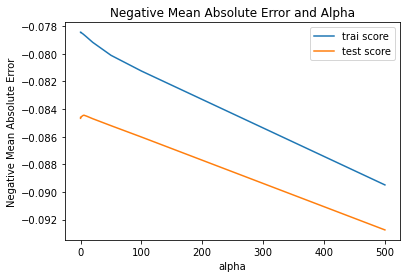

In [61]:
# Plotting mean scores with alpha for train and test

ridge_cval_output['param_alpha'] = ridge_cval_output['param_alpha'].astype('int32')

# plottting

plt.plot(ridge_cval_output['param_alpha'], ridge_cval_output['mean_train_score'])
plt.plot(ridge_cval_output['param_alpha'], ridge_cval_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [62]:
# Get best estimator for lambda
ridge_model_cval.best_estimator_

Ridge(alpha=6.0)

In [153]:
# Check the coefficient values with lambda value as 10
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02103681,  0.08181119,  0.03941695, -0.0254239 ,  0.06164039,
        0.01805447,  0.09856328,  0.01122354,  0.01473571,  0.01981828,
        0.0338818 , -0.01397978, -0.02195447,  0.00971608,  0.02503211,
        0.01799222,  0.01327791,  0.01973881,  0.01609861,  0.0118807 ,
       -0.01828494,  0.02151135,  0.07028502,  0.02529975,  0.11537995,
        0.0879096 ,  0.02288702, -0.01277307,  0.0150119 , -0.01140736,
        0.01275085,  0.01917773, -0.00029541,  0.02011489,  0.03347316,
        0.01399596,  0.01799666, -0.00029541,  0.01811805, -0.01047522,
        0.02911404,  0.01461841,  0.02873244,  0.05061095,  0.02318388,
        0.00918386,  0.02860874,  0.01822511, -0.01677507,  0.01915425])

In [154]:
# Display mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013654625317955202

In [134]:
# Creating new dataframe wtih Features and coefficients

new_df_ridge = pd.DataFrame({'Features': X_train.columns, 'Coefficient': ridge.coef_.round(4)})
new_df_ridge.reset_index(drop=True, inplace=True)
new_df_ridge

,Features,Coefficient
0,LotArea,0.0210
1,OverallQual,0.0818
2,OverallCond,0.0394
3,BsmtUnfSF,-0.0254
4,TotalBsmtSF,0.0616
5,1stFlrSF,0.0181
6,GrLivArea,0.0986
7,BsmtFullBath,0.0112
8,FullBath,0.0147
9,HalfBath,0.0198


In [155]:
# Assign the features and their coefficient values to a dictonary to use later in plotting bar plots

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.021,
 'OverallQual': 0.0818,
 'OverallCond': 0.0394,
 'BsmtUnfSF': -0.0254,
 'TotalBsmtSF': 0.0616,
 '1stFlrSF': 0.0181,
 'GrLivArea': 0.0986,
 'BsmtFullBath': 0.0112,
 'FullBath': 0.0147,
 'HalfBath': 0.0198,
 'GarageCars': 0.0339,
 'OrigVsRemod': -0.014,
 'PropertyAge': -0.022,
 'GarageAge': 0.0097,
 'New_BsmtQual': 0.025,
 'New_HeatingQC': 0.018,
 'New_KitchenQual': 0.0133,
 'New_FireplaceQu': 0.0197,
 'New_BsmtExposure': 0.0161,
 'New_BsmtFinType1': 0.0119,
 'New_BldgType': -0.0183,
 'New_SaleCondition': 0.0215,
 'MSZoning_FV': 0.0703,
 'MSZoning_RH': 0.0253,
 'MSZoning_RL': 0.1154,
 'MSZoning_RM': 0.0879,
 'Neighborhood_Crawfor': 0.0229,
 'Neighborhood_MeadowV': -0.0128,
 'Neighborhood_NridgHt': 0.015,
 'Neighborhood_OldTown': -0.0114,
 'Neighborhood_StoneBr': 0.0128,
 'Exterior1st_BrkFace': 0.0192,
 'Exterior1st_CBlock': -0.0003,
 'Exterior1st_HdBoard': 0.0201,
 'Exterior1st_MetalSd': 0.0335,
 'Exterior1st_Plywood': 0.014,
 'Exterior1st_Stucco': 0.018,
 'Exterior2nd

### RFE wtih 15 features

In [156]:
# RFE with best feature selection 15

X_train_rd = X_train[new_df_ridge.Features]
lm = LinearRegression()
lm.fit(X_train_rd, y_train)

# Executing RFE

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_rd, y_train)

In [157]:
# Method to get the coefficient values

def determine(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dt_ten = pd.DataFrame(list(zip(X_train_rd.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dt_ten = dt_ten.loc[dt_ten['rfe_support'] == True]
dt_ten.reset_index(drop = True, inplace=True)

dt_ten['Coefficient'] = dt_ten['Features'].apply(determine)
dt_ten = dt_ten.sort_values(by=['Coefficient'], ascending=False)
dt_ten = dt_ten.head(10)   # Considering only top 10 features
dt_ten

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.1154
4,GrLivArea,True,1,0.0986
12,MSZoning_RM,True,1,0.0879
0,OverallQual,True,1,0.0818
9,MSZoning_FV,True,1,0.0703
3,TotalBsmtSF,True,1,0.0616
14,Foundation_PConc,True,1,0.0506
1,OverallCond,True,1,0.0394
5,GarageCars,True,1,0.0339
13,Foundation_CBlock,True,1,0.0287


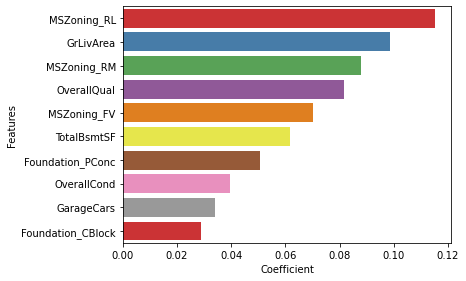

In [158]:
# Bar plot to determine top features that would affect the pricing using rdige regression

plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dt_ten)
plt.show()

Rige Regression findings:
- MSZoning, GrLivArea, MSZoning_RM, OvrallQual, MSZoning_FV,TotalBsmSF, Foundation_Pconc, OverallCond, GarageCars and Foundation_CBlock are the top 10 features when alpha is choosen as '6' which was proposed by best_estimator.
 
- When alpha value dobulled from 6 to 12 then the top feature is changed from MSZoning_RL to GrLivArea

### Lasso Rgression

In [94]:
lasso = Lasso()

# Alpha values

params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]}

# Cross Validation

folds = 5

lasso_model_cvl = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1)
lasso_model_cvl.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# Viewing mean score

lasso_cvl_output = pd.DataFrame(lasso_model_cvl.cv_results_)
lasso_cvl_output[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.078444,-0.084612,1
1,0.0002,-0.078468,-0.084646,2
2,0.0003,-0.078517,-0.084710,3
3,0.0004,-0.078587,-0.084809,4
4,0.0005,-0.078671,-0.084923,5
5,0.001,-0.079363,-0.085829,6
6,0.002,-0.081173,-0.087201,7
7,0.003,-0.082427,-0.087844,8
8,0.004,-0.083402,-0.088538,9
9,0.005,-0.084295,-0.089199,10


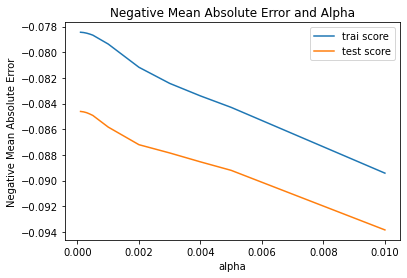

In [97]:
# Plotting mean scores with alpha for train and test

lasso_cvl_output['param_alpha'] = lasso_cvl_output['param_alpha'].astype('float64')

# plottting

plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_train_score'])
plt.plot(lasso_cvl_output['param_alpha'], lasso_cvl_output['mean_test_score'])
plt.xlabel ('alpha')
plt.ylabel ('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['trai score', 'test score'], loc = 'upper right')
plt.show()

In [98]:
# get the best estimates for lambda

lasso_model_cvl.best_estimator_

Lasso(alpha=0.0001)

In [140]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.02091005,  0.08125187,  0.03870597, -0.02612211,  0.06346174,
        0.01535959,  0.10156479,  0.01066308,  0.01297968,  0.0181709 ,
        0.03464048, -0.01339798, -0.02216736,  0.00985974,  0.02511816,
        0.01805919,  0.01275521,  0.01944961,  0.01650337,  0.01130135,
       -0.01840019,  0.02076668,  0.08637499,  0.03316358,  0.14659271,
        0.1151817 ,  0.02274584, -0.01277299,  0.01510598, -0.01171043,
        0.01286773,  0.01996787, -0.00059816,  0.02061932,  0.0341626 ,
        0.01458306,  0.01813293, -0.        ,  0.01833062, -0.01070545,
        0.02964307,  0.01497873,  0.02969238,  0.05166999,  0.0236206 ,
        0.01004373,  0.02793133,  0.01768027, -0.01704542,  0.01865787])

In [141]:
# Checking the mean square error

mean_squared_error(y_test,lasso.predict(X_test))

0.013834146436199214

In [142]:
# Put the slected features and coefficients in a dataframe

lasso_new = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_new = lasso_new[lasso_new['Coefficient']!=0.00] # Feature eliminaions where coefficient is Zero
lasso_new.reset_index(drop =True, inplace=True)
lasso_new

,Features,Coefficient
0,LotArea,0.0209
1,OverallQual,0.0813
2,OverallCond,0.0387
3,BsmtUnfSF,-0.0261
4,TotalBsmtSF,0.0635
5,1stFlrSF,0.0154
6,GrLivArea,0.1016
7,BsmtFullBath,0.0107
8,FullBath,0.0130
9,HalfBath,0.0182


In [143]:
# Put the features and coefficients in dict

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.020910053232659213,
 'OverallQual': 0.08125187014964254,
 'OverallCond': 0.03870596946459315,
 'BsmtUnfSF': -0.026122111886592806,
 'TotalBsmtSF': 0.0634617420398864,
 '1stFlrSF': 0.015359592597421687,
 'GrLivArea': 0.1015647901089385,
 'BsmtFullBath': 0.01066308261418061,
 'FullBath': 0.012979681508638811,
 'HalfBath': 0.018170901577084366,
 'GarageCars': 0.034640479703213135,
 'OrigVsRemod': -0.013397982096439956,
 'PropertyAge': -0.022167357938821703,
 'GarageAge': 0.009859737173732844,
 'New_BsmtQual': 0.025118157894844517,
 'New_HeatingQC': 0.018059192375768234,
 'New_KitchenQual': 0.012755214976222212,
 'New_FireplaceQu': 0.01944961130188409,
 'New_BsmtExposure': 0.016503370416995455,
 'New_BsmtFinType1': 0.011301353628788285,
 'New_BldgType': -0.018400192058198126,
 'New_SaleCondition': 0.02076668483173492,
 'MSZoning_FV': 0.08637498612834876,
 'MSZoning_RH': 0.03316357577586606,
 'MSZoning_RL': 0.14659271307110913,
 'MSZoning_RM': 0.11518170287627065,
 'Neighborho

### RFE with limited features

In [144]:
# Peform again RFE to minimise the features to 15

X_train_lasso = X_train[lasso_new.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# Executing RFE 

rfe = RFE(lm,15)
rfe = rfe.fit(X_train_lasso, y_train)

In [145]:
def determine(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to new dataframe for further usage in bar plot

dtl_ten = pd.DataFrame(list(zip(X_train_lasso.columns,rfe.support_, rfe.ranking_)), columns =['Features', 'rfe_support', 'rfe_ranking'])
dtl_ten = dtl_ten.loc[dtl_ten['rfe_support'] == True]
dtl_ten.reset_index(drop = True, inplace=True)

dtl_ten['Coefficient'] = dtl_ten['Features'].apply(determine)
dtl_ten = dtl_ten.sort_values(by=['Coefficient'], ascending=False)
dtl_ten = dtl_ten.head(10)   # Considering only top 10 features
dtl_ten

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.146593
12,MSZoning_RM,True,1,0.115182
4,GrLivArea,True,1,0.101565
9,MSZoning_FV,True,1,0.086375
0,OverallQual,True,1,0.081252
3,TotalBsmtSF,True,1,0.063462
14,Foundation_PConc,True,1,0.051670
1,OverallCond,True,1,0.038706
5,GarageCars,True,1,0.034640
10,MSZoning_RH,True,1,0.033164


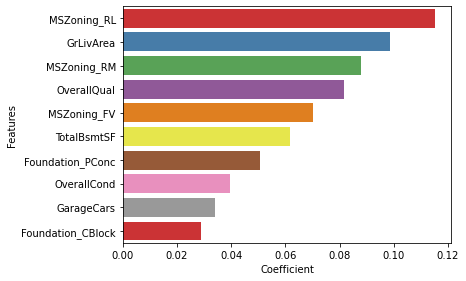

In [146]:
# Bar plot to determine top features that would affect the pricing using Lasso Regression

plt.figure(figsize = (20,20))
plt.subplot(4,3,1)
se.barplot(y = 'Features', x = 'Coefficient', palette = 'Set1', data = dt_ten)
plt.show()

Lasso Regression findings:

MSZoning, GrLivArea, MSZoning_RM, OvrallQual, MSZoning_FV,TotalBsmSF, Foundation_Pconc, OverallCond, GarageCars and Foundation_CBlock are the top 10 features.
 

When doubled alpha value of Ridge 

Mean Squared error is 0.0136 when alpha value is 6 

Mean Squared error is 0.0134 when alpha value is 12 

When doubled alpha value of Lasso 

Mean Squared error is 0.0138 when alpha value is 0.0001 

Mean Squared error is 0.0137 when alpha value is 0.0002 

Observation – MSE is decreased when alpha value doubled but not significant change. 

Based on the Mean Squared error, Ridge Regression seems to be better. As there are many predictors influencing response variables, Ridge regression would porform better. 

However, Lasso would help us minimize the features as the coefficents would become absolute zero at certain point.

Lasso Mean Squared error would be less if drop some of the predictors, Lasso does well when we have less predictors which influence response varaibles.